In [44]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [45]:
lr=LinearRegression()
decision_tree=DecisionTreeRegressor()
random_forest=RandomForestRegressor()

In [3]:
file_path = 'data/Bank Dataset/INDUSINDBK.csv'
data = pd.read_csv(file_path)
data

,Time,Open,High,Low,Close
0,2018-08-23 09:16:00,1964.62,1965.36,1954.67,1954.87
1,2018-08-23 09:17:00,1954.87,1959.74,1954.87,1958.15
2,2018-08-23 09:18:00,1958.10,1958.30,1953.77,1953.77
3,2018-08-23 09:19:00,1953.92,1955.46,1952.63,1953.18
4,2018-08-23 09:20:00,1953.18,1954.67,1952.08,1952.68
...,...,...,...,...,...
196849,2020-10-12 15:26:00,612.85,613.00,612.30,612.35
196850,2020-10-12 15:27:00,612.35,612.50,612.30,612.40
196851,2020-10-12 15:28:00,612.40,612.50,612.00,612.35
196852,2020-10-12 15:29:00,612.45,612.50,612.00,612.45


In [4]:
data.describe()

,Open,High,Low,Close
count,196854.000000,196854.000000,196854.000000,196854.000000
mean,1214.432744,1215.296450,1213.533731,1214.415382
std,469.019512,469.115518,468.913732,469.010740
min,235.550000,235.550000,235.550000,235.550000
25%,618.762500,619.300000,618.250000,618.800000
50%,1415.600000,1416.560000,1414.570000,1415.570000
75%,1529.660000,1530.610000,1528.600000,1529.650000
max,1964.620000,1965.360000,1956.660000,1958.150000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196854 entries, 0 to 196853
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    196854 non-null  object 
 1   Open    196854 non-null  float64
 2   High    196854 non-null  float64
 3   Low     196854 non-null  float64
 4   Close   196854 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.5+ MB


In [6]:
data.shape

(196854, 5)

In [7]:
data['Date'] = pd.to_datetime(data['Time']).dt.date
data['Time'] = pd.to_datetime(data['Time']).dt.time

In [8]:
data

,Time,Open,High,Low,Close,Date
0,09:16:00,1964.62,1965.36,1954.67,1954.87,2018-08-23
1,09:17:00,1954.87,1959.74,1954.87,1958.15,2018-08-23
2,09:18:00,1958.10,1958.30,1953.77,1953.77,2018-08-23
3,09:19:00,1953.92,1955.46,1952.63,1953.18,2018-08-23
4,09:20:00,1953.18,1954.67,1952.08,1952.68,2018-08-23
...,...,...,...,...,...,...
196849,15:26:00,612.85,613.00,612.30,612.35,2020-10-12
196850,15:27:00,612.35,612.50,612.30,612.40,2020-10-12
196851,15:28:00,612.40,612.50,612.00,612.35,2020-10-12
196852,15:29:00,612.45,612.50,612.00,612.45,2020-10-12


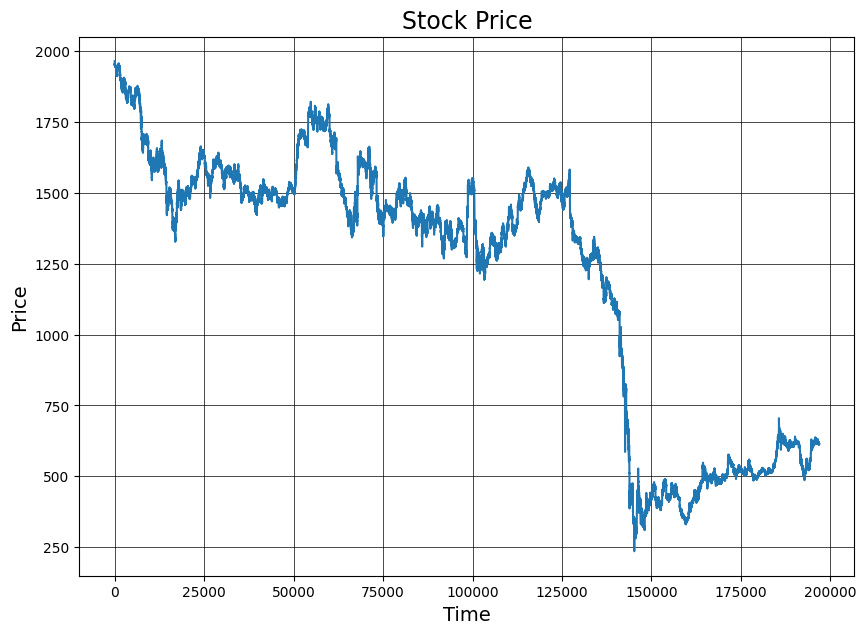

In [9]:
data['Open'].plot(figsize=(10,7))
plt.title("Stock Price",fontsize=17)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(which="major",color="k",linestyle="-",linewidth=0.5)
plt.show()

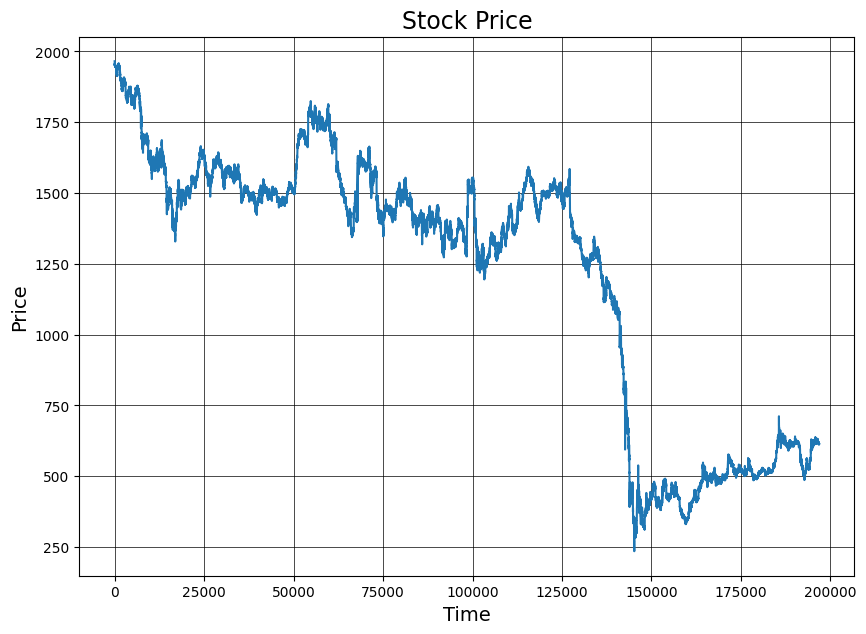

In [10]:
data['High'].plot(figsize=(10,7))
plt.title("Stock Price",fontsize=17)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(which="major",color="k",linestyle="-",linewidth=0.5)
plt.show()

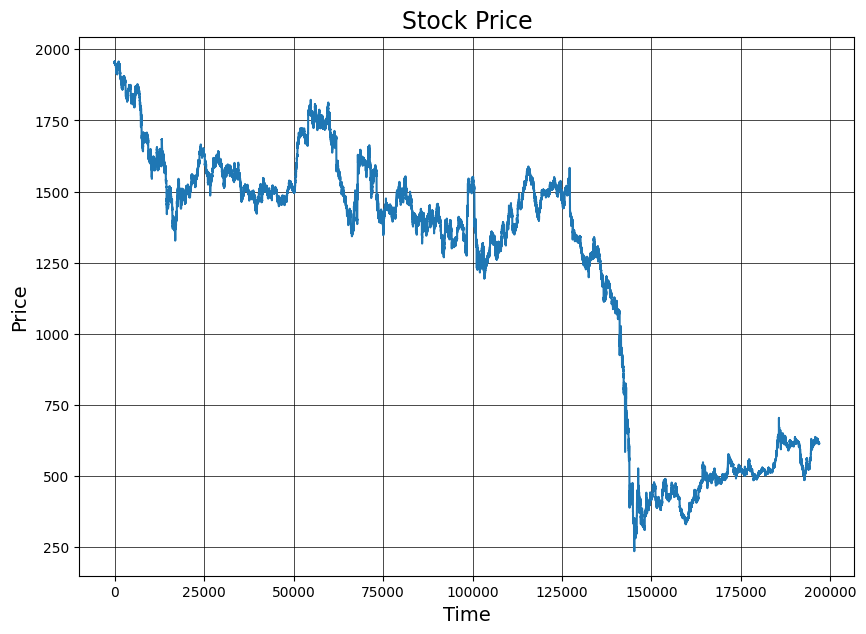

In [11]:
data['Close'].plot(figsize=(10,7))
plt.title("Stock Price",fontsize=17)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(which="major",color="k",linestyle="-",linewidth=0.5)
plt.show()

<Axes: >

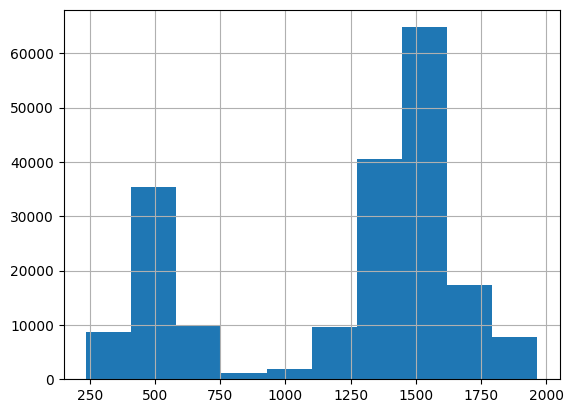

In [12]:
data['Open'].hist()

<Axes: >

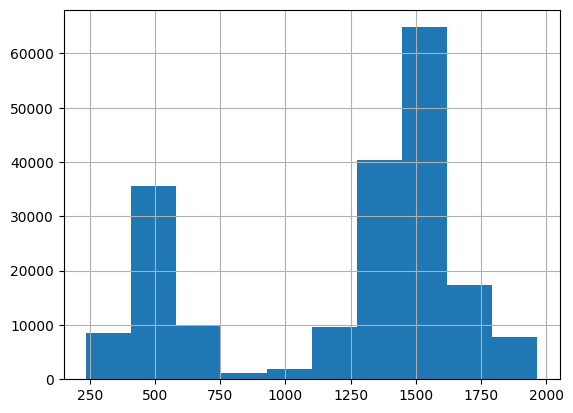

In [13]:
data['High'].hist()

<Axes: >

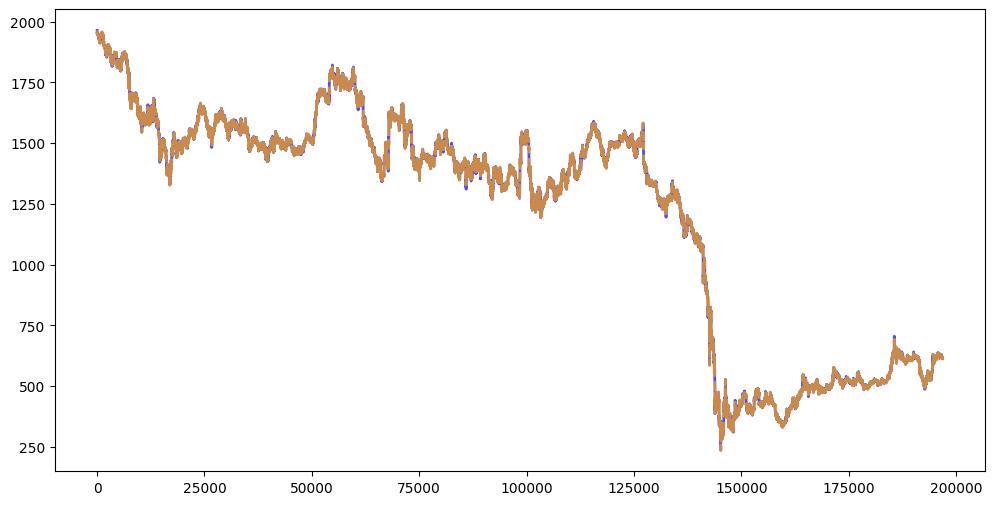

In [19]:
# data[['Open','Close']].plot(marker='o', figsize=(10, 6), title="Open and Close Prices")
fig, ax = plt.subplots(figsize=(12, 6))
data['Open'].plot(ax=ax, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Open')
data['Close'].plot(ax=ax, linestyle='--', linewidth=2, color='orange', alpha=0.7, label='Close')

<Axes: >

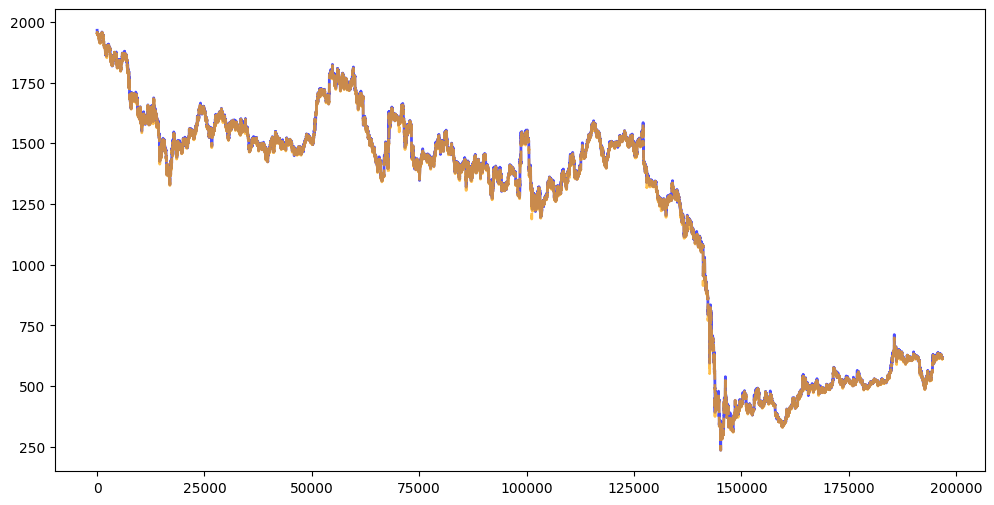

In [20]:
# data[['High','Low']].plot(marker='o', figsize=(10, 6), title="High and Low Prices")
fig, ax = plt.subplots(figsize=(12, 6))
data['High'].plot(ax=ax, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='High')
data['Low'].plot(ax=ax, linestyle='--', linewidth=2, color='orange', alpha=0.7, label='Low')

**Split the dataset into X and y.**

In [21]:
X=data[['High','Low','Open']].values  #Independent variables
y=data['Close'].values   #Dependent variables

**Splitting the model into testing and training.**

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137797, 3), (59057, 3), (137797,), (59057,))

**Training the model using Linear Regression**

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=lr.predict(X_test)

In [26]:
y_pred

array([ 481.28467646, 1519.81494305, 1336.66682538, ..., 1378.51824344,
       1503.86545866, 1297.2613789 ])

In [29]:
print("Model coefficients: ",lr.coef_)
print("Model intercept: ",lr.intercept_)

Model coefficients:  [ 0.74668629  0.73027289 -0.4769683 ]
Model intercept:  0.004870247216103962


**Prediction table of Actual and Predicted values**

In [31]:
dframe=pd.DataFrame(y_test,y_pred)
dfr=pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
print(dfr)

       Actual Price  Predicted Price
0            481.30       481.284676
1           1519.97      1519.814943
2           1336.90      1336.666825
3            505.05       505.027233
4           1567.00      1566.573608
...             ...              ...
59052       1516.30      1516.149068
59053       1450.98      1450.772768
59054       1378.50      1378.518243
59055       1503.65      1503.865459
59056       1297.00      1297.261379

[59057 rows x 2 columns]


**Normality of Residual**

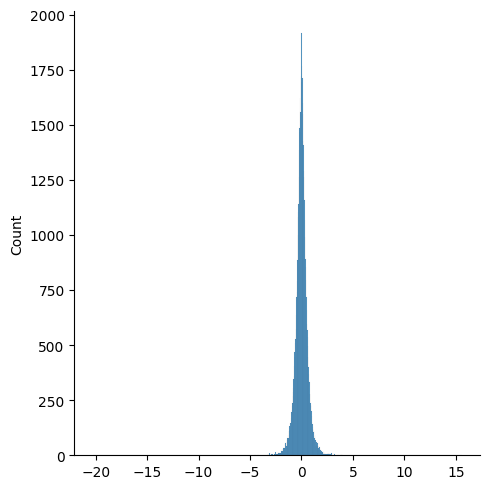

In [32]:
residual=y_test-y_pred
sns.displot(residual)

**Computing the accuracy of Linear Regression model**

In [77]:
R2_score=round(r2_score(y_test,y_pred),6)   #R2 score to get the accuracy of your model on a percentage scale
MAE=round(mean_absolute_error(y_test,y_pred),3)
MSE=round(mean_squared_error(y_test,y_pred),3)
RMSE=round(np.sqrt(mean_squared_error(y_test,y_pred)),3)

In [78]:
print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Squared Error: ",RMSE)
print("R2 Score: ",R2_score*100,"%")

Mean Absolute Error:  0.428
Mean Squared Error:  0.435
Root Mean Squared Error:  0.659
R2 Score:  99.99980000000001 %


**Training the model using Decision Tree**

In [47]:
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
y_pred2=decision_tree.predict(X_test)

In [49]:
y_pred2

array([ 481.75, 1519.82, 1336.  , ..., 1378.  , 1504.05, 1299.3 ])

**Prediction table of Actual and Predicted values (Decision Tree)**

In [52]:
dframe2=pd.DataFrame(y_test,y_pred2)
dfr2=pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred2})
print(dfr2)

       Actual Price  Predicted Price
0            481.30           481.75
1           1519.97          1519.82
2           1336.90          1336.00
3            505.05           505.10
4           1567.00          1566.87
...             ...              ...
59052       1516.30          1516.00
59053       1450.98          1451.23
59054       1378.50          1378.00
59055       1503.65          1504.05
59056       1297.00          1299.30

[59057 rows x 2 columns]


**Normality of Residual**

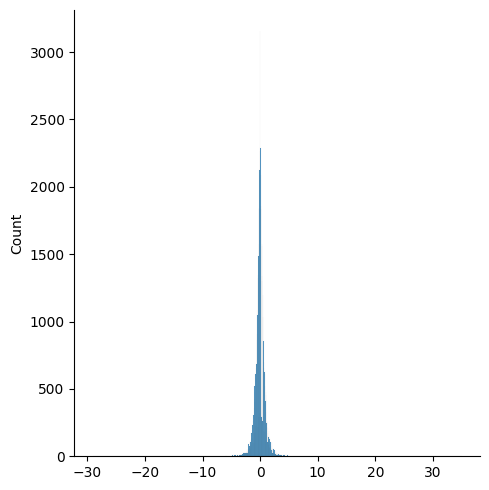

In [53]:
residual2=y_test-y_pred2
sns.displot(residual2)

**Computing the accuracy of Decision Tree model**

In [79]:
R2_score2=round(r2_score(y_test,y_pred2),6)  #R2 score to get the accuracy of your model on a percentage scale
MAE2=round(mean_absolute_error(y_test,y_pred2),3)
MSE2=round(mean_squared_error(y_test,y_pred2),3)
RMSE2=round(np.sqrt(mean_squared_error(y_test,y_pred2)),3)

In [80]:
print("Mean Absolute Error: ",MAE2)
print("Mean Squared Error: ",MSE2)
print("Root Mean Squared Error: ",RMSE2)
print("R2 Score: ",R2_score2*100,"%")

Mean Absolute Error:  0.599
Mean Squared Error:  1.034
Root Mean Squared Error:  1.017
R2 Score:  99.9995 %


**Training the model using Random Forest**

In [56]:
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
y_pred3=random_forest.predict(X_test)

In [58]:
y_pred3

array([ 481.474  , 1519.88715, 1336.444  , ..., 1378.3515 , 1504.0976 ,
       1297.3625 ])

**Prediction of Actual and Predicted values (Random Forest)**

In [59]:
dframe3=pd.DataFrame(y_test,y_pred2)
dfr3=pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred3})
print(dfr3)

       Actual Price  Predicted Price
0            481.30       481.474000
1           1519.97      1519.887150
2           1336.90      1336.444000
3            505.05       505.005279
4           1567.00      1566.529900
...             ...              ...
59052       1516.30      1516.063500
59053       1450.98      1450.865100
59054       1378.50      1378.351500
59055       1503.65      1504.097600
59056       1297.00      1297.362500

[59057 rows x 2 columns]


**Normality of Residual**

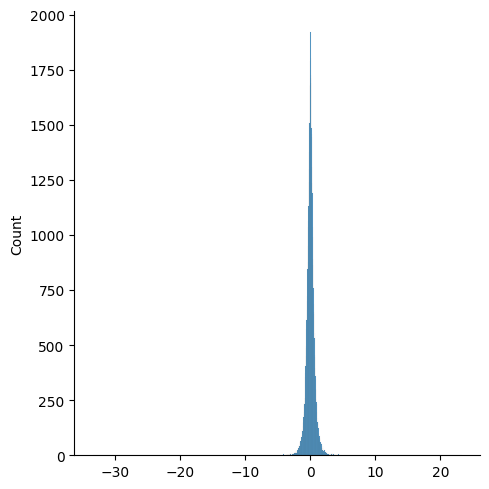

In [60]:
residual3=y_test-y_pred3
sns.displot(residual3)

**Computing the accuracy of Random Forest model**

In [81]:
R2_score3=round(r2_score(y_test,y_pred3),6)  #R2 score to get the accuracy of your model on a percentage scale
MAE3=round(mean_absolute_error(y_test,y_pred3),3)
MSE3=round(mean_squared_error(y_test,y_pred3),3)
RMSE3=round(np.sqrt(mean_squared_error(y_test,y_pred3)),3)

In [82]:
print("R2 Score: ",R2_score3*100)
print("Mean Absolute Error: ",MAE3)
print("Mean Squared Error: ",MSE3)
print("Root Mean Square Error: ",RMSE3)

R2 Score:  99.9997
Mean Absolute Error:  0.473
Mean Squared Error:  0.621
Root Mean Square Error:  0.788


In [63]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

**Mean Absolute Percentage Error for Linear Regression Model**

In [64]:
MAPE_LR=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error for Linear Regression:', round(MAPE_LR, 2), '%')

Mean Absolute Percentage Error for Linear Regression: 0.04 %


**Mean Absolute Percentage Error for Decision Tree Model**

In [65]:
MAPE_Decison_Tree=mean_absolute_percentage_error(y_test,y_pred2)
print('Mean Absolute Percentage Error for Decision Tree:', round(MAPE_Decison_Tree, 2), '%')

Mean Absolute Percentage Error for Decision Tree: 0.06 %


**Mean Absolute Percentage Error for Random Forest Model**

In [66]:
MAPE_Random_Forest=mean_absolute_percentage_error(y_test,y_pred3)
print('Mean Absolute Percentage Error for Decision Tree:', round(MAPE_Random_Forest, 2), '%')

Mean Absolute Percentage Error for Decision Tree: 0.05 %


**From the above calculations we found that the Mean Absolute Error (MAE) of Linear Regression is lesser than Decision Tree and Random Forest Algorithms.**